## **Importing Neccessary Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_recall_curve,f1_score,precision_score ,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
import joblib

## **Import the Data**

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Alase_phd_assignment/customer_churn_dataset-training-master.csv',parse_dates=True)

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Alase_phd_assignment/customer_churn_dataset-testing-master.csv',parse_dates=True)

In [ ]:
df=train_data.copy()

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
print("This data has {} columns and {} rows".format(df.shape[1],df.shape[0]))

This data has 12 columns and 440833 rows


In [ ]:
df.dtypes

,0
CustomerID,float64
Age,float64
Gender,object
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,object
Contract Length,object
Total Spend,float64


In [ ]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [ ]:
df[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The row above has all it columns empty so we would have to drop it

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
df['Age'].nunique()

48

In [ ]:
df['Gender'].nunique()

2

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,250252
Female,190580


In [ ]:
df['Tenure'].nunique()

60

In [ ]:
df['Subscription Type'].value_counts()

,count
Subscription Type,
Standard,149128
Premium,148678
Basic,143026


In [ ]:
df['Contract Length'].value_counts()

,count
Contract Length,
Annual,177198
Quarterly,176530
Monthly,87104


In [ ]:
df['Churn'].value_counts()

,count
Churn,
1.0,249999
0.0,190833


## **EDA**

<Axes: xlabel='Churn', ylabel='count'>

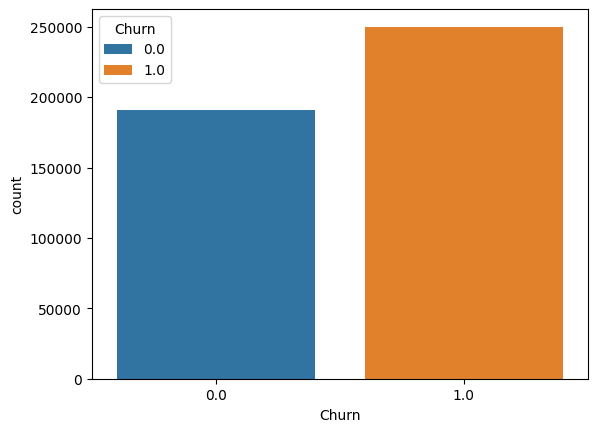

In [ ]:
sns.countplot(x='Churn',data=df,hue='Churn')

<Axes: xlabel='Contract Length', ylabel='count'>

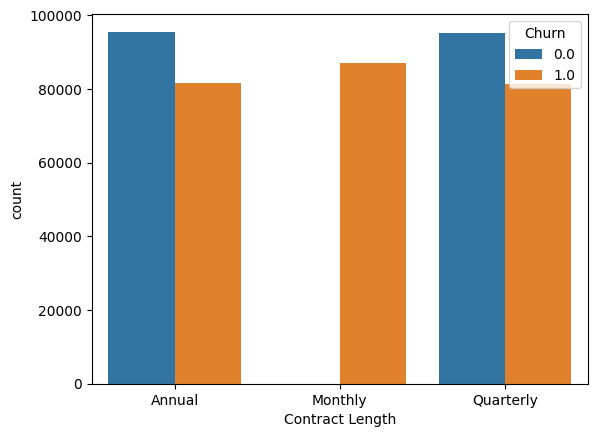

In [ ]:
sns.countplot(x='Contract Length',data=df,hue='Churn')

<Axes: xlabel='Churn', ylabel='count'>

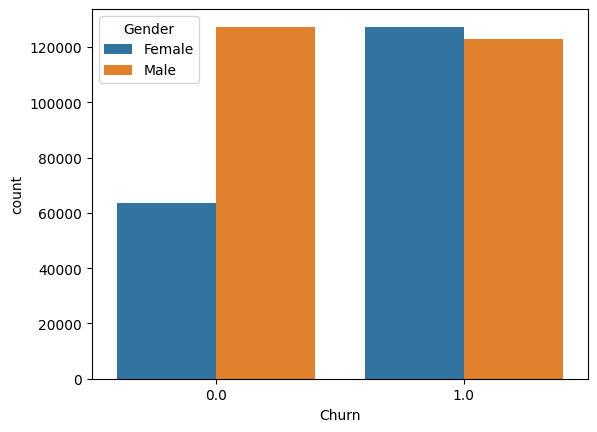

In [ ]:
sns.countplot(x='Churn',data=df,hue='Gender')

<Axes: xlabel='Subscription Type', ylabel='count'>

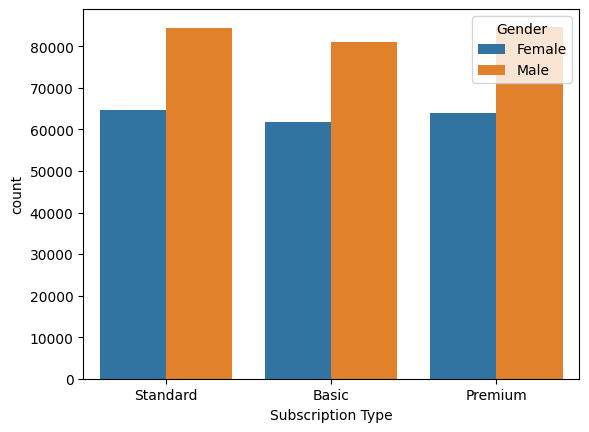

In [ ]:
sns.countplot(x='Subscription Type',data=df,hue='Gender')

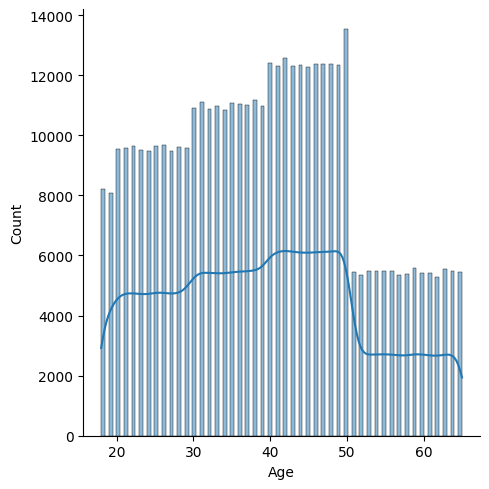

In [ ]:
sns.displot(x='Age',data=df,kde=True)

In [ ]:
def plot_distributions(df, columns=None, figsize=(15, 5), bins=30):
    """
    Plot distributions for numerical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - columns: list of column names to plot (if None, all numerical columns will be used)
    - figsize: tuple, size of each individual plot
    - bins: int, number of bins for histogram
    """
    if columns is None:
        # Select only numerical columns
        columns = df.select_dtypes(include=[np.number]).columns

    for col in columns:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)
        fig.suptitle(f'Distribution of {col}', fontsize=16)

        # Histogram with KDE
        sns.histplot(data=df, x=col, kde=True, ax=ax1, bins=bins)
        ax1.set_title('Histogram with KDE')

        # Box plot
        sns.boxplot(x=df[col], ax=ax2)
        ax2.set_title('Box Plot')

        # Q-Q plot
        stats.probplot(df[col], dist="norm", plot=ax3)
        ax3.set_title('Q-Q Plot')

        plt.tight_layout()
        plt.show()

        # Print statistics
        print(f"\nStatistics for {col}:")
        print(df[col].describe())
        print(f"Skewness: {df[col].skew():.4f}")
        print(f"Kurtosis: {df[col].kurtosis():.4f}")

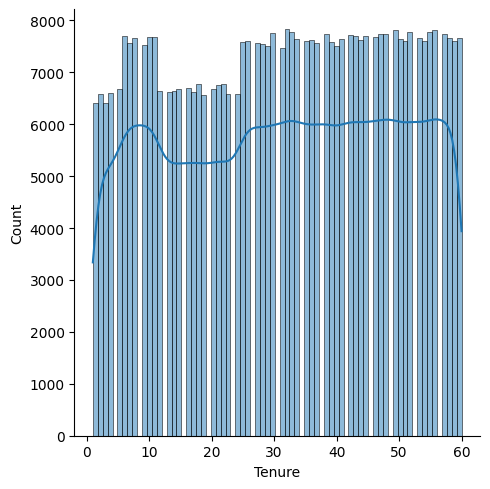

In [ ]:
sns.displot(x='Tenure',data=df,kde=True)

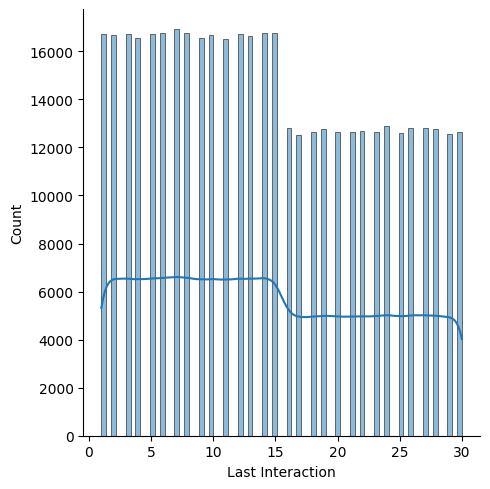

In [ ]:
sns.displot(x='Last Interaction',data=df,kde=True)

In [ ]:
from scipy import stats

def plot_normality_check(data, column_name=None, figsize=(12, 8)):
    """
    Create a comprehensive plot to check if the data is normally distributed or skewed.

    Parameters:
    - data: pandas Series or numpy array
    - column_name: str, name of the column (optional, for labeling purposes)
    - figsize: tuple, size of the figure (width, height)

    Returns:
    - None (displays the plot and prints skewness)
    """
    if isinstance(data, pd.DataFrame):
        raise ValueError("Please provide a pandas Series or numpy array, not a DataFrame.")

    if isinstance(data, pd.Series):
        column_name = data.name if column_name is None else column_name
        data = data.dropna().values
    else:
        data = data[~np.isnan(data)]

    # Calculate skewness
    skewness = stats.skew(data)

    # Create the plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle(f"Normality Check for {column_name if column_name else 'Data'}", fontsize=16)

    # Histogram with KDE
    sns.histplot(data=data, kde=True, ax=ax1)
    ax1.set_title('Histogram with KDE')
    if column_name:
        ax1.set_xlabel(column_name)

    # Q-Q plot
    stats.probplot(data, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot')

    # Box plot
    sns.boxplot(x=data, ax=ax3)
    ax3.set_title('Box Plot')

    # Violin plot
    sns.violinplot(x=data, ax=ax4)
    ax4.set_title('Violin Plot')

    plt.tight_layout()
    plt.show()

    # Print skewness
    print(f"Skewness: {skewness:.4f}")
    if abs(skewness) < 0.5:
        print("The data is approximately symmetric.")
    elif abs(skewness) < 1:
        print("The data is moderately skewed.")
    else:
        print("The data is highly skewed.")
    print(f"Direction: {'Positive' if skewness > 0 else 'Negative'} skew ({'right' if skewness > 0 else 'left'}-tailed)")

# Example usage:
# Assuming df is your DataFrame and 'age' is the column you want to check


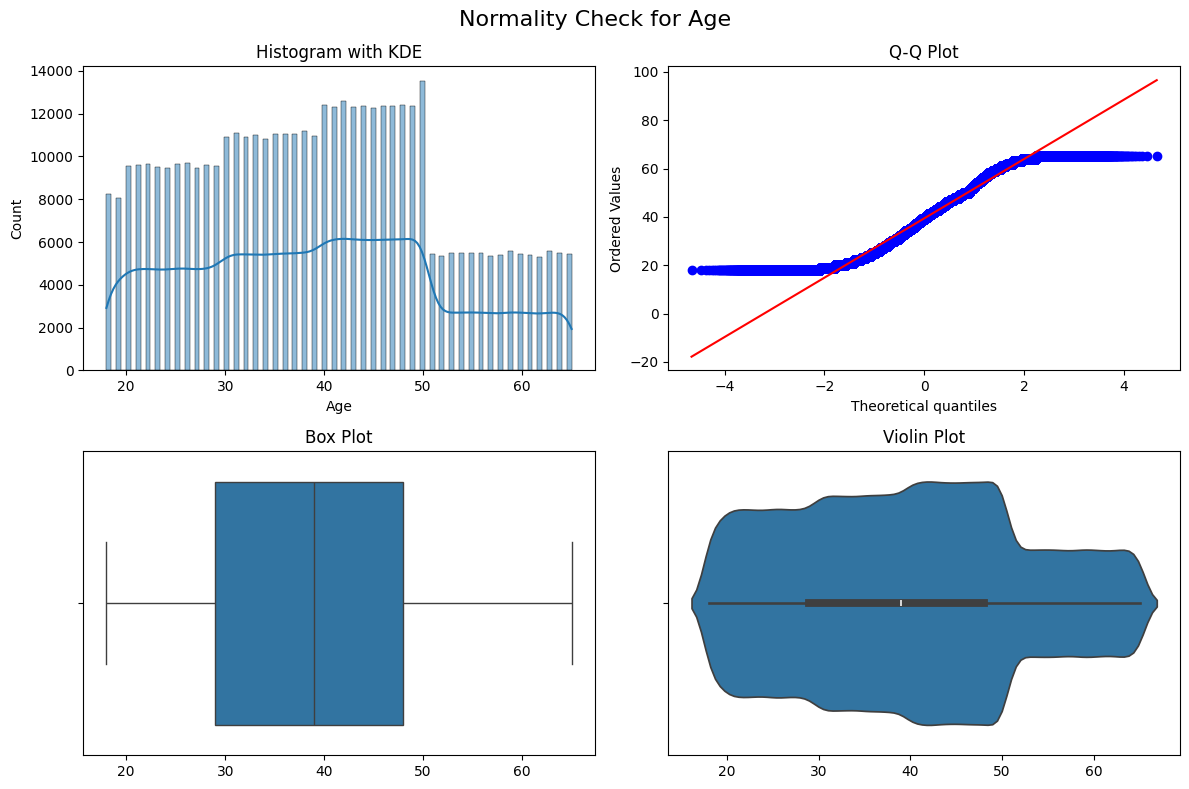

Skewness: 0.1620
The data is approximately symmetric.
Direction: Positive skew (right-tailed)


In [ ]:
plot_normality_check(df['Age'])

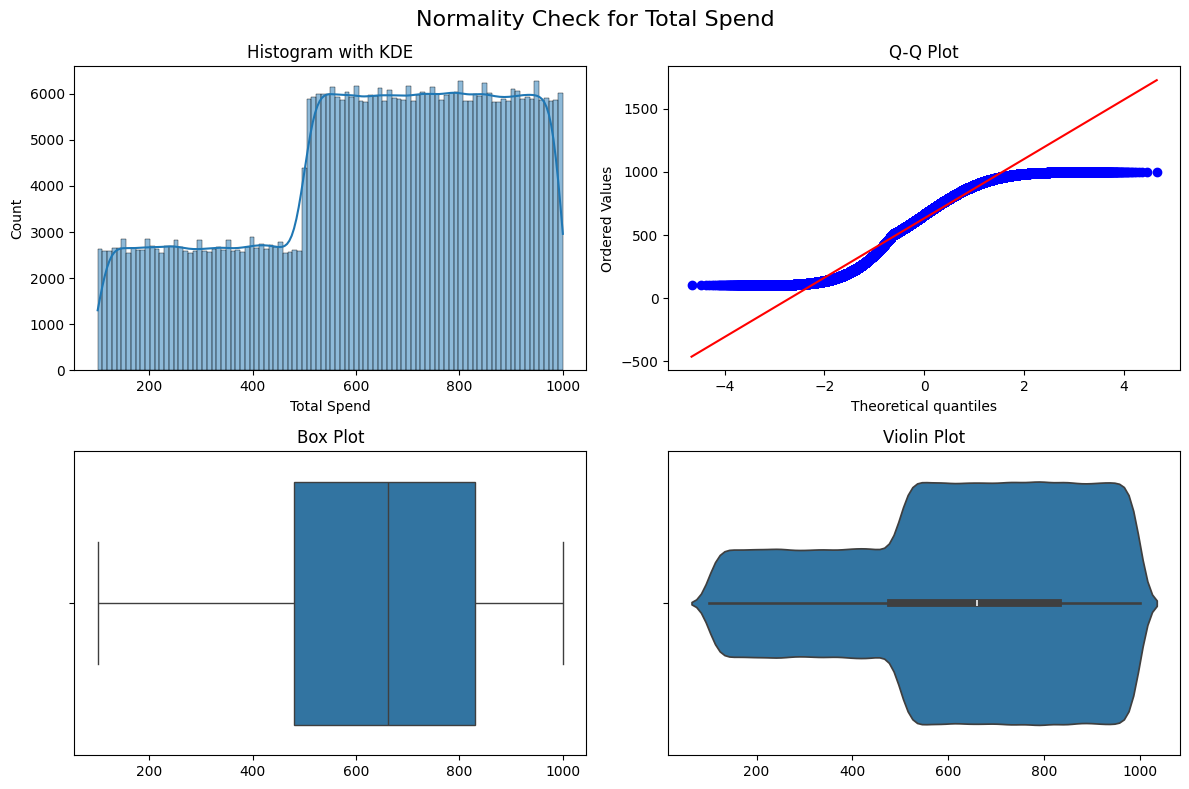

Skewness: -0.4572
The data is approximately symmetric.
Direction: Negative skew (left-tailed)


In [ ]:
plot_normality_check(df['Total Spend'])

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


## **Data Preprocessing**

In [ ]:
df.drop(columns=['CustomerID'],inplace =True)

In [ ]:
# Split the dataset into training and testing sets
X_train = df.drop(columns=['Churn'])
y_train = df['Churn']
X_test = test_data.drop(columns=['Churn'])
y_test = test_data['Churn']

In [ ]:
# oversampling the dataset to balance the target (y) classes
ros = RandomOverSampler(random_state=42)
X_train,y_train = ros.fit_resample(X_train,y_train)

In [ ]:
# Define categorical columns that need encoding
columns_to_encode=['Gender','Subscription Type','Contract Length']
# Define numeric columns for scaling
numeric_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']



In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scaling numeric columns
        ('cat', OneHotEncoder(), columns_to_encode)  # One-hot encoding for categorical columns
    ]
)

In [ ]:
# Function to plot ROC AUC curve
def plot_roc_auc(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
# Model 1: Support Vector Classifier (SVC)
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))  # Enable probability estimates for ROC AUC
])

# Cross-validation
svc_cv_scores = cross_val_score(svc_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("SVC Cross-validation scores:", svc_cv_scores)
print("SVC Mean cross-validation accuracy:", svc_cv_scores.mean())



In [ ]:

# Fit and evaluate on test set
svc_pipeline.fit(X_train, y_train)
svc_y_pred = svc_pipeline.predict(X_test)
svc_y_pred_proba = svc_pipeline.predict_proba(X_test)[:, 1]

# Metrics
print("SVC Classification Report:")
print(classification_report(y_test, svc_y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,svc_y_pred))
print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, svc_y_pred))
print(f"SVC ROC AUC Score: {roc_auc_score(y_test, svc_y_pred_proba)}")

# Plot ROC AUC Curve
plot_roc_auc(y_test, svc_y_pred_proba, 'SVC')

In [ ]:
# Model 2: Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Cross-validation
logreg_cv_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-validation scores:", logreg_cv_scores)
print("Logistic Regression Mean cross-validation accuracy:", logreg_cv_scores.mean())

# Fit and evaluate on test set
logreg_pipeline.fit(X_train, y_train)
logreg_y_pred = logreg_pipeline.predict(X_test)
logreg_y_pred_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

# Metrics
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,logreg_y_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logreg_y_pred))
print(f"Logistic Regression ROC AUC Score: {roc_auc_score(y_test, logreg_y_pred_proba)}")

# Plot ROC AUC Curve
plot_roc_auc(y_test, logreg_y_pred_proba, 'Logistic Regression')


In [ ]:
# Model 3: K-Nearest Neighbors (KNN)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Cross-validation
knn_cv_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("KNN Cross-validation scores:", knn_cv_scores)
print("KNN Mean cross-validation accuracy:", knn_cv_scores.mean())

# Fit and evaluate on test set
knn_pipeline.fit(X_train, y_train)
knn_y_pred = knn_pipeline.predict(X_test)
knn_y_pred_proba = knn_pipeline.predict_proba(X_test)[:, 1]

# Metrics
print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,knn_y_pred))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))
print(f"KNN ROC AUC Score: {roc_auc_score(y_test, knn_y_pred_proba)}")

# Plot ROC AUC Curve
plot_roc_auc(y_test, knn_y_pred_proba, 'KNN')

In [ ]:
'''import pickle
import numpy as np

# Assuming 'logreg_pipeline' is your trained pipeline
# Manually set the 'feature_names_in_' attribute to match the column order during training
logreg_pipeline.named_steps['preprocessor'].feature_names_in_ = np.array([
    'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
    'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
    'Last Interaction'
])

# Save the pipeline using pickle
with open('logreg_pipeline.pkl', 'wb') as file:
    pickle.dump(logreg_pipeline, file)

# Download the saved model file to your local system
from google.colab import files
files.download('logreg_pipeline.pkl')
'''

In [ ]:
df.columns

In [ ]:
import sklearn
import joblib
print(sklearn.__version__)
print(joblib.__version__)
